# Diabetes dataset EDA

https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# !pip install ucimlrepo xgboost lightgbm -q

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

In [4]:
# metadata
# print(cdc_diabetes_health_indicators.metadata)
cdc_diabetes_health_indicators.metadata

{'uci_id': 891,
 'name': 'CDC Diabetes Health Indicators',
 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators',
 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv',
 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Tabular', 'Multivariate'],
 'num_instances': 253680,
 'num_features': 21,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Sex', 'Age', 'Education Level', 'Income'],
 'target_col': ['Diabetes_binary'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol

In [5]:
# variable information
# print(cdc_diabetes_health_indicators.variables)
cdc_diabetes_health_indicators.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not including job 0 = no 1 = yes,None,no


In [6]:
df = pd.concat([cdc_diabetes_health_indicators.data.features, cdc_diabetes_health_indicators.data.targets], axis=1)
# with ZipFile('diabetes_binary_health_indicators_BRFSS2015.csv.zip') as z:
#     with z.open('diabetes_binary_health_indicators_BRFSS2015.csv') as f:
#         df = pd.read_csv(f)

In [7]:
df.head(50)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [10]:
cat_cols = df.columns.drop('BMI')
num_cols = df['BMI']

Text(0.5, 0.9, 'Categorical Features Distribution')

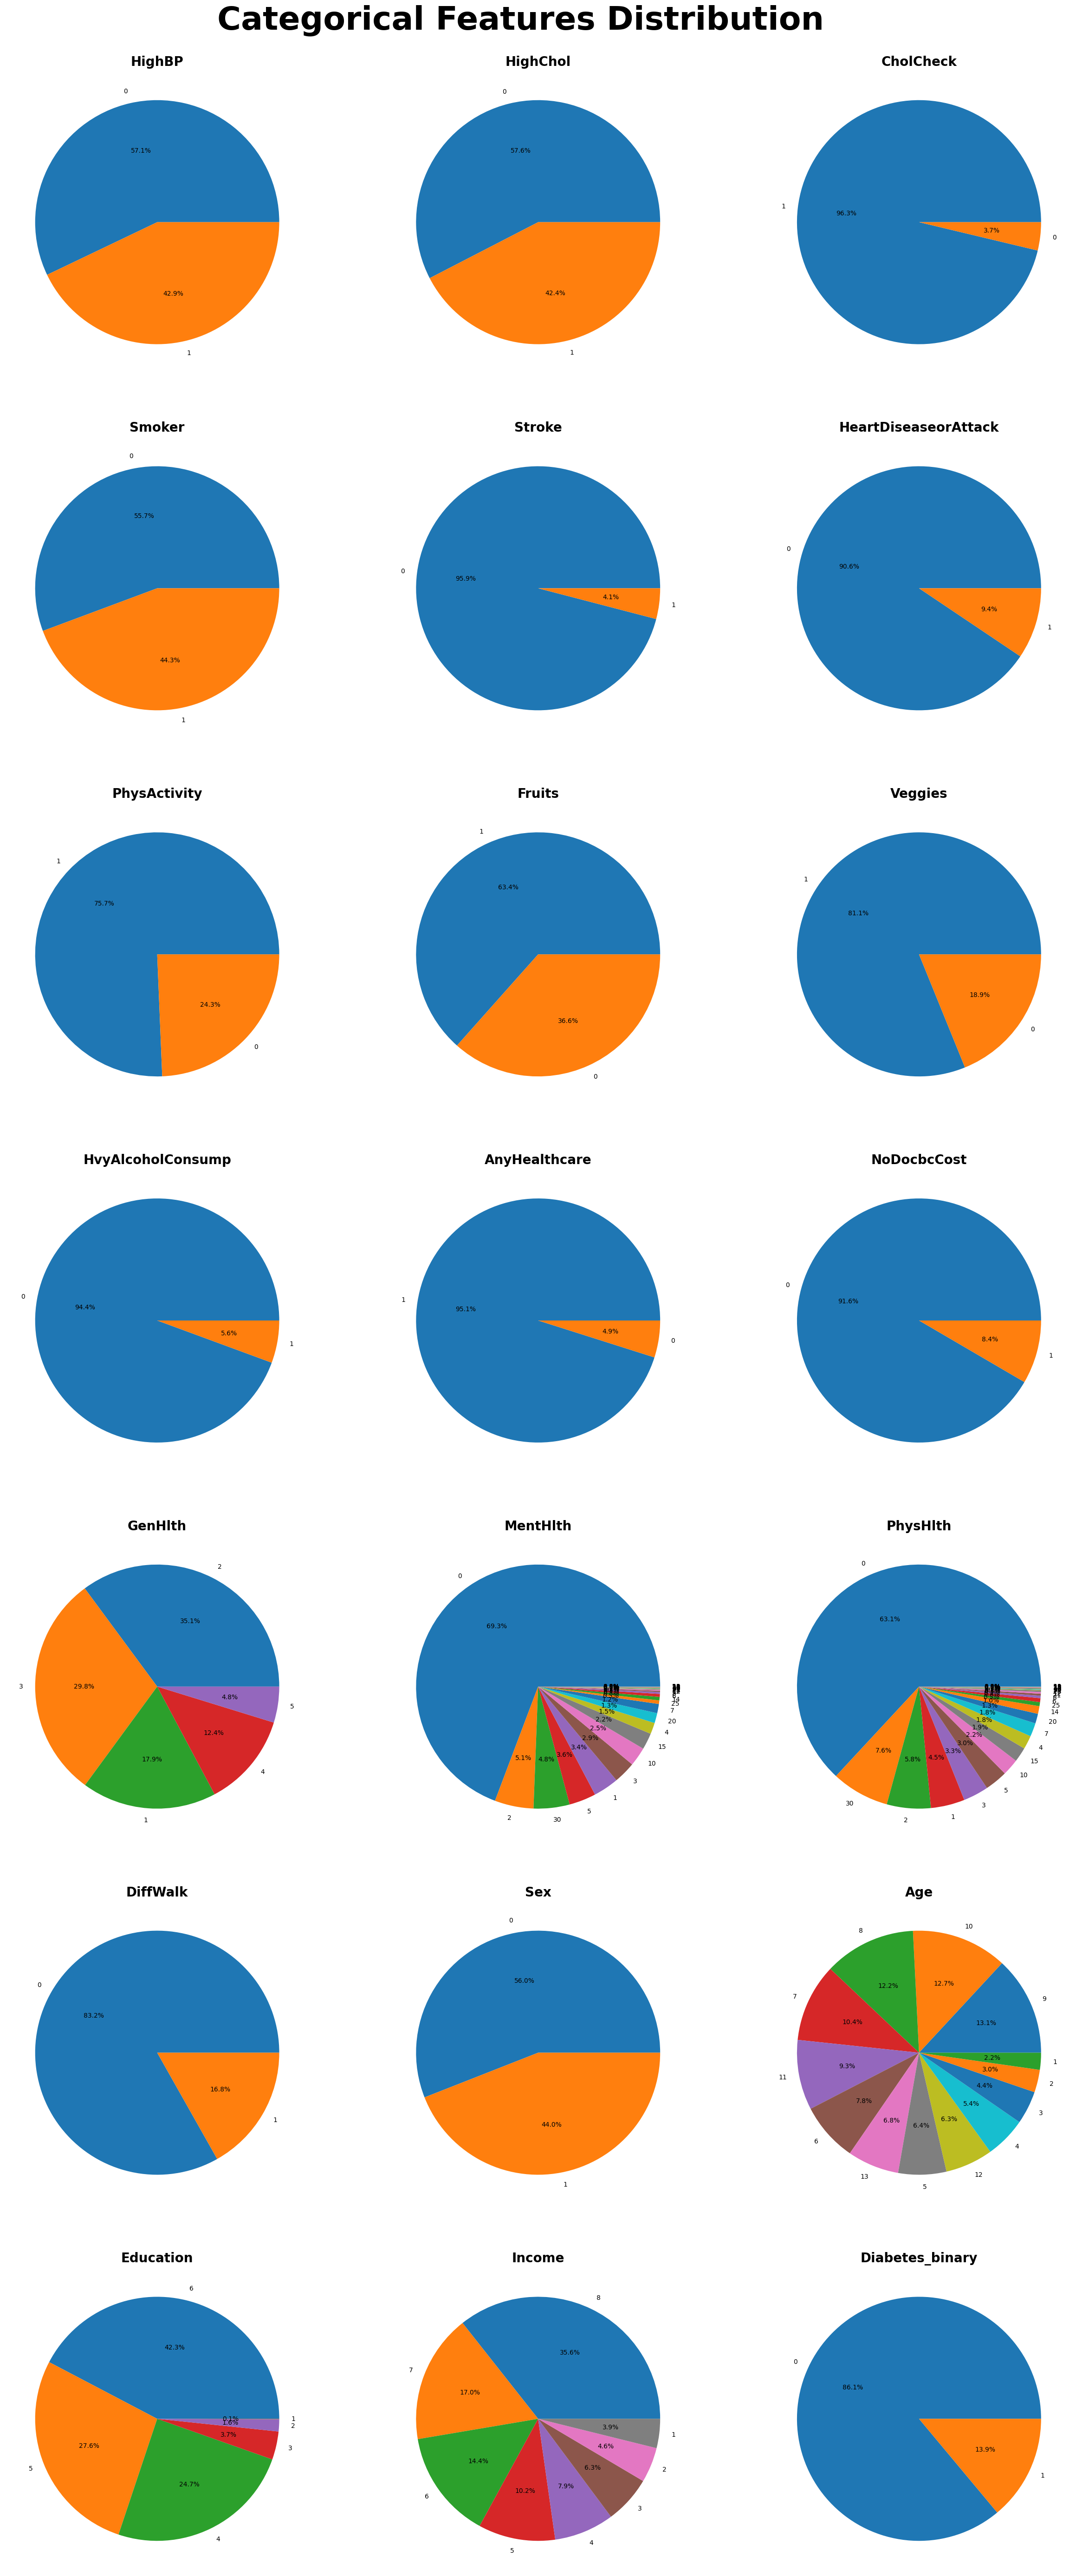

In [11]:
fig , ax = plt.subplots(nrows=7, ncols=3, figsize=(30,70))
ax = ax.flatten()
for i , col in enumerate(cat_cols):
    ax[i].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
    ax[i].set_title(col , fontsize=20 , fontweight='bold')
plt.suptitle("Categorical Features Distribution",fontsize = 50, fontweight = 'bold' , y = 0.9)
# plt.tight_layout()

Text(0.5, 1.0, 'BMI Distribution')

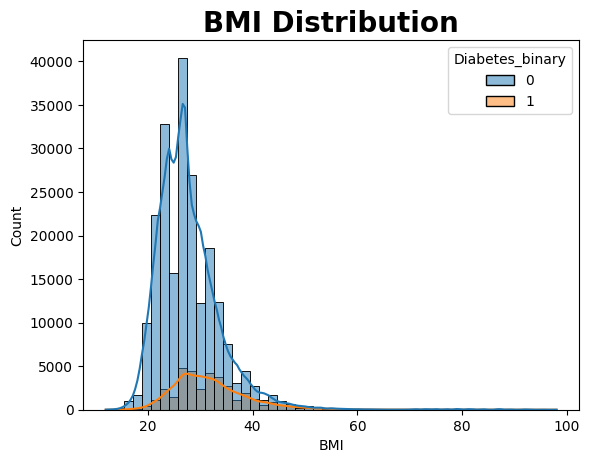

In [12]:
sns.histplot(x='BMI', kde=True , hue='Diabetes_binary',data=df,bins=50)
plt.title('BMI Distribution', fontsize=20, fontweight='bold')

<Axes: xlabel='Diabetes_binary', ylabel='BMI'>

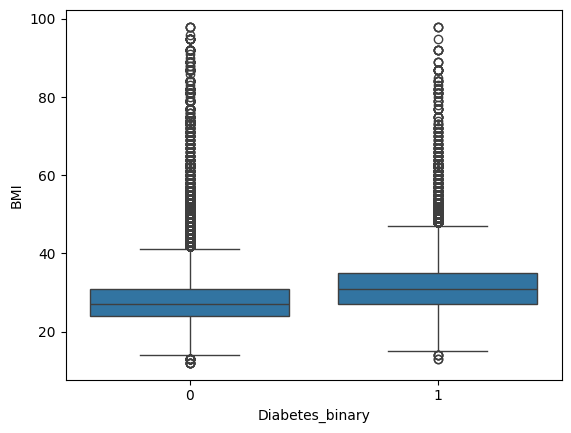

In [13]:
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)

In [14]:
df['Age'].value_counts().sort_index()

Age
1      5700
2      7598
3     11123
4     13823
5     16157
6     19819
7     26314
8     30832
9     33244
10    32194
11    23533
12    15980
13    17363
Name: count, dtype: int64

In [15]:
from sklearn.linear_model import  LogisticRegression , SGDClassifier , RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score , precision_score , f1_score , recall_score

In [16]:
models = {'Logistic Regression' : LogisticRegression(solver='lbfgs', max_iter=1000),
        #   'SVM' : SVC(),
          'Decision Tree' : DecisionTreeClassifier(),
          'Random Forest' : RandomForestClassifier(),
          'AdaBoost' : AdaBoostClassifier(algorithm='SAMME'),
          'Bagging' : BaggingClassifier(),
          'Gradient Boosting' : GradientBoostingClassifier(),
          'Naive Bayes' : GaussianNB(),
          'SGD' : SGDClassifier(),
          'Ridge' : RidgeClassifier(),
          'ExtraTrees' : ExtraTreeClassifier(),
          'XGB' : XGBClassifier(),
        #   'KNN' : KNeighborsClassifier(n_neighbors=5),
        #   'LGB' : lgb
          }

In [17]:
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets
# X = df.drop('Diabetes_binary', axis=1)
# y = df['Diabetes_binary']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
def model_selection(model:dict, X_train, y_train, X_test, y_test):
    """
    Tests each model in the models dict against the training data and test data
    and provides its accuracy score
    :param model: dictionary of the models
    :param X_train: Training data
    :param y_train: Training labels
    :param X_test: Test data
    :param y_test: Test labels
    :return: Accuracy score
    """
    a = []
    p = []
    f = []
    r = []

    for name, model in model.items():
        model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        a.append(accuracy) , p.append(precision) , f.append(f1) , r.append(recall)
        print('Accuracy score for {}: {}'.format(name, accuracy))
    names = list(models.keys())
    results = pd.DataFrame({'Model_Name':names , 'Accuracy':a , 'Precison':p , 'F1 score': f , 'Recall':r})
    return results.sort_values('Accuracy', ascending= False, ignore_index=True)

In [20]:
results = model_selection(models, X_train, y_train, X_test, y_test)

Accuracy score for Logistic Regression: 0.8625236518448439
Accuracy score for Decision Tree: 0.796456165247556
Accuracy score for Random Forest: 0.8583845789971618
Accuracy score for AdaBoost: 0.8635485651214128
Accuracy score for Bagging: 0.8470119836013876
Accuracy score for Gradient Boosting: 0.8658349101229896
Accuracy score for Naive Bayes: 0.7766083254493851
Accuracy score for SGD: 0.8598036896877956
Accuracy score for Ridge: 0.8598233995584988
Accuracy score for ExtraTrees: 0.8022311573636077
Accuracy score for XGB: 0.864514348785872


In [21]:
results

,Model_Name,Accuracy,Precison,F1 score,Recall
0,Gradient Boosting,0.865835,0.598923,0.264347,0.169602
1,XGB,0.864514,0.580124,0.261971,0.169186
2,AdaBoost,0.863549,0.557416,0.287684,0.193870
3,Logistic Regression,0.862524,0.558358,0.244558,0.156566
4,Ridge,0.859823,0.615385,0.069110,0.036611
5,SGD,0.859804,0.620098,0.066413,0.035085
6,Random Forest,0.858385,0.505499,0.249608,0.165719
7,Bagging,0.847012,0.419185,0.269115,0.198169
8,ExtraTrees,0.802231,0.301505,0.299400,0.297324
9,Decision Tree,0.796456,0.298916,0.309646,0.321176


## Light Gradient Boosting

In [22]:
#lgb
train_set , test_set = train_test_split(df,random_state=0)

In [23]:
train_label = train_set['Diabetes_binary']
test_label = test_set['Diabetes_binary']

In [24]:
label = 'Diabetes_binary'
train_set.drop(label,axis=1,inplace = True)
test_set.drop(label,axis=1,inplace = True)

In [25]:
train_data = lgb.Dataset(train_set, label=train_label)
valid_data = lgb.Dataset(test_set, label=test_label)

In [26]:
param = {'num_leaves': 31, 'objective': 'binary', 'metric': 'AUC'}

In [27]:
num_round = 10
bst = lgb.train(param, train_data, num_round, valid_sets=valid_data, callbacks=[lgb.early_stopping(stopping_rounds=10)])

[LightGBM] [Info] Number of positive: 26344, number of negative: 163916
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 190260, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.138463 -> initscore=-1.828114
[LightGBM] [Info] Start training from score -1.828114
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.823242


## Section 2 - EDA and Feature Engineering

In [28]:
for i in df.columns:
    if i!='Diabetes_binary' or i!='BMI':
        print('Chi Square Test for',i)
        cross_tab = pd.crosstab(df['Diabetes_binary'], df[i])
        chi, p, dof, expected = stats.chi2_contingency(cross_tab)
        if p < 0.05:
            print('Significant')
        else:
            print('Not Significant')
        print('Chi-Square:', chi)
        print('P-Value:', p)
        print('Degree of Freedom:', dof)
        print('------------------------------------')
        

Chi Square Test for HighBP
Significant
Chi-Square: 17562.446089970756
P-Value: 0.0
Degree of Freedom: 1
------------------------------------
Chi Square Test for HighChol
Significant
Chi-Square: 10174.074889118883
P-Value: 0.0
Degree of Freedom: 1
------------------------------------
Chi Square Test for CholCheck
Significant
Chi-Square: 1062.9381436620106
P-Value: 3.75139887891887e-233
Degree of Freedom: 1
------------------------------------
Chi Square Test for BMI
Significant
Chi-Square: 14715.988202162389
P-Value: 0.0
Degree of Freedom: 83
------------------------------------
Chi Square Test for Smoker
Significant
Chi-Square: 937.0557592033365
P-Value: 8.640171809942516e-206
Degree of Freedom: 1
------------------------------------
Chi Square Test for Stroke
Significant
Chi-Square: 2838.91654723932
P-Value: 0.0
Degree of Freedom: 1
------------------------------------
Chi Square Test for HeartDiseaseorAttack
Significant
Chi-Square: 7971.155840643359
P-Value: 0.0
Degree of Freedom: 1


In [29]:
# Student T-test between BMI and Diabetes_binary
no_dia = df[df['Diabetes_binary'] == 0]['BMI']
dia = df[df['Diabetes_binary'] == 1]['BMI']
t_stat, p_val = stats.ttest_ind(no_dia, dia)
print('T-Statistic:', t_stat)
print('P-Value:', p_val)
if p_val < 0.05:
    print('Significant')
else:
    print('Not Significant')

T-Statistic: -111.87814193117426
P-Value: 0.0
Significant


In [30]:
# Dropping outliers
lower_limit = np.quantile(df['BMI'], 0.25)
upper_limit = np.quantile(df['BMI'], 0.75)
outlier_index = df[(df['BMI'] < lower_limit) | (df['BMI'] > upper_limit)].index
df.drop(outlier_index, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140147 entries, 1 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                140147 non-null  int64
 1   HighChol              140147 non-null  int64
 2   CholCheck             140147 non-null  int64
 3   BMI                   140147 non-null  int64
 4   Smoker                140147 non-null  int64
 5   Stroke                140147 non-null  int64
 6   HeartDiseaseorAttack  140147 non-null  int64
 7   PhysActivity          140147 non-null  int64
 8   Fruits                140147 non-null  int64
 9   Veggies               140147 non-null  int64
 10  HvyAlcoholConsump     140147 non-null  int64
 11  AnyHealthcare         140147 non-null  int64
 12  NoDocbcCost           140147 non-null  int64
 13  GenHlth               140147 non-null  int64
 14  MentHlth              140147 non-null  int64
 15  PhysHlth              140147 non-null  

In [32]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [33]:
# from imblearn.under_sampling import RandomUnderSampler
# smt = RandomUnderSampler(random_state=42)
# X , y = smt.fit_resample(X, y)

In [34]:
# pd.concat([X, y], axis=1)['Diabetes_binary'].value_counts()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
col_trans = ColumnTransformer(transformers=[('scaler', scaler, ['BMI'])], remainder='passthrough')
X_train = col_trans.fit_transform(X_train)
X_test = col_trans.transform(X_test)
results = model_selection(models, X_train, y_train, X_test, y_test)

Accuracy score for Logistic Regression: 0.8797003210845523
Accuracy score for Decision Tree: 0.8125936496610774
Accuracy score for Random Forest: 0.8755975740278273
Accuracy score for AdaBoost: 0.8814841241526935
Accuracy score for Bagging: 0.8639671780235462
Accuracy score for Gradient Boosting: 0.8818408847663218
Accuracy score for Naive Bayes: 0.7816981805208705
Accuracy score for SGD: 0.8810916874777025
Accuracy score for Ridge: 0.8812343917231538
Accuracy score for ExtraTrees: 0.8213342846949697
Accuracy score for XGB: 0.8804495183731716


In [36]:
results

,Model_Name,Accuracy,Precison,F1 score,Recall
0,Gradient Boosting,0.881841,0.541176,0.076923,0.041404
1,AdaBoost,0.881484,0.512941,0.116019,0.065407
2,Ridge,0.881234,0.833333,0.002995,0.001500
3,SGD,0.881092,0.000000,0.000000,0.000000
4,XGB,0.880450,0.481557,0.123004,0.070507
5,Logistic Regression,0.879700,0.460922,0.120042,0.069007
6,Random Forest,0.875598,0.382263,0.125408,0.075008
7,Bagging,0.863967,0.324561,0.188896,0.133213
8,ExtraTrees,0.821334,0.239178,0.234719,0.230423
9,Decision Tree,0.812594,0.245628,0.260870,0.278128


In [37]:
model_1 = GradientBoostingClassifier()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     24697
           1       0.54      0.04      0.08      3333

    accuracy                           0.88     28030
   macro avg       0.71      0.52      0.51     28030
weighted avg       0.84      0.88      0.83     28030



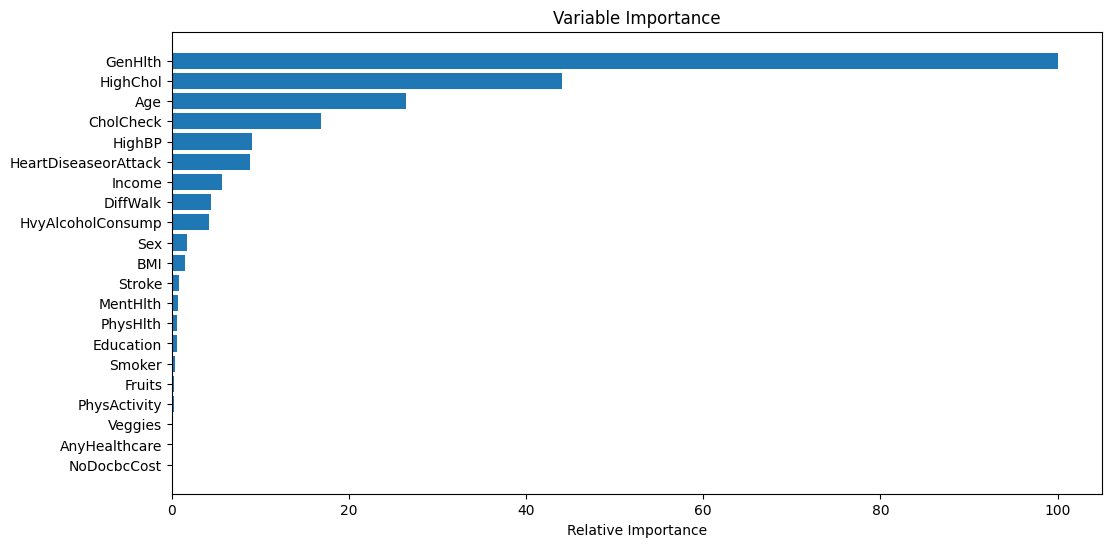

In [38]:
# Feature Importance
feature_importance = model_1.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

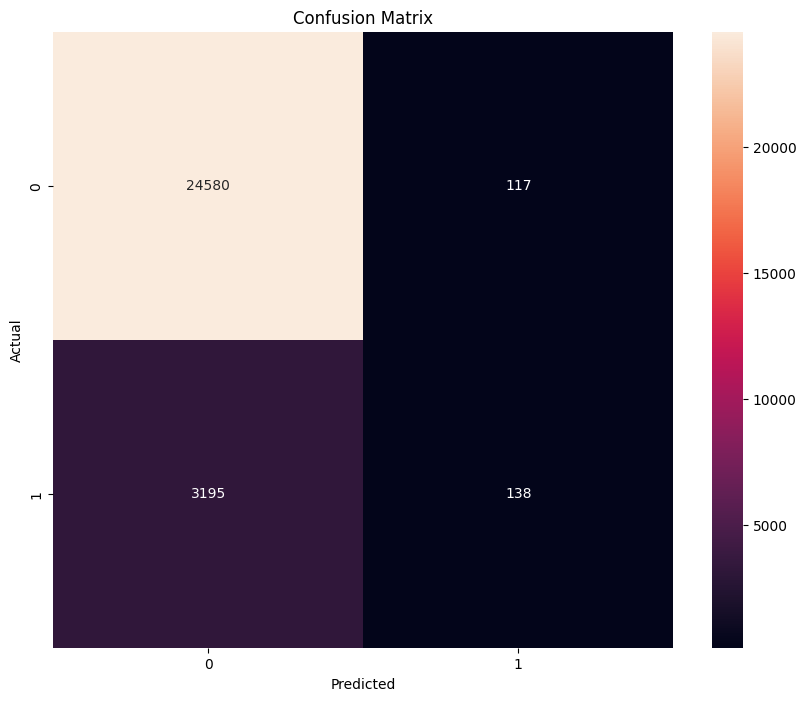

In [39]:
# Plot confusion matrix for Gradient Boosting
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

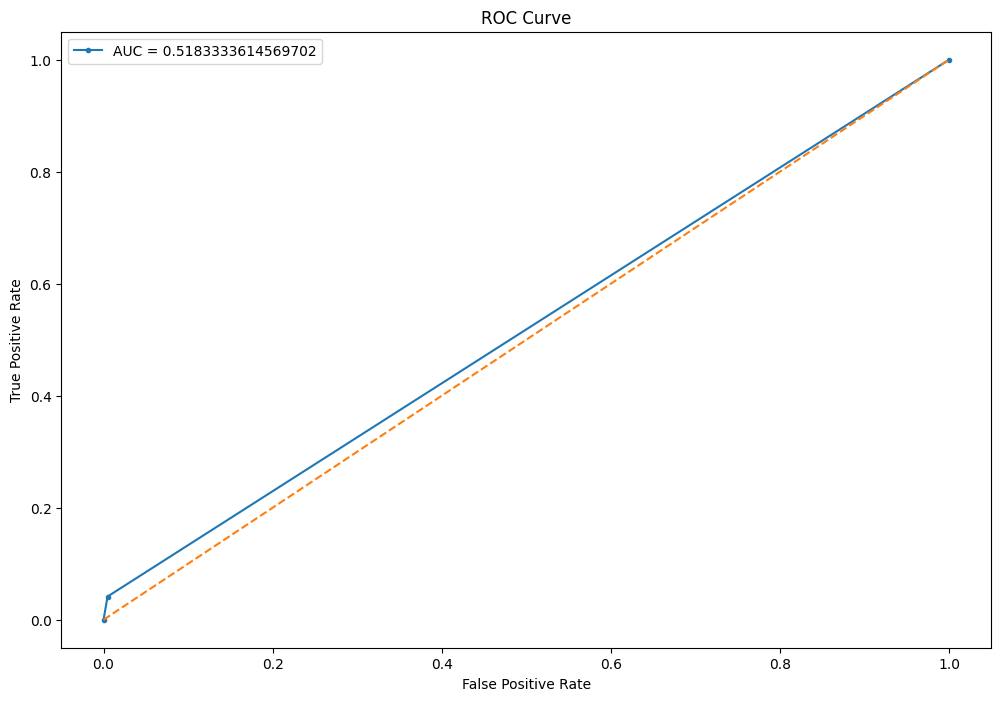

In [40]:
# AUC ROC Curve for Gradient Boosting
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['AUC = {}'.format(roc_auc_score(y_test, y_pred))])
plt.show()


## Yggdrasil Decision Forest

In [41]:
import ydf

In [42]:
df['Diabetes_binary'] = df['Diabetes_binary'].astype('Int16')

In [43]:
train_ds , test_ds = train_test_split(df,random_state=0)

In [44]:
model = ydf.GradientBoostedTreesLearner(label='Diabetes_binary').train(train_ds)

Train model on 105110 examples
Model trained in 0:00:02.790953


In [45]:
model.describe()

In [46]:
model.evaluate(test_ds)

Label \ Pred,0,1
0,30755,3995
1,128,159


In [47]:
model.analyze(test_ds)